In [631]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

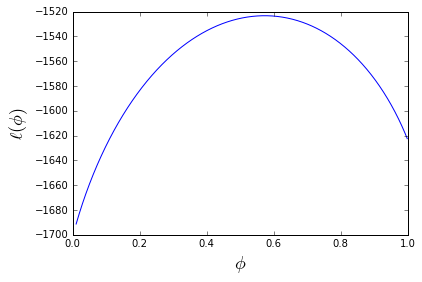

In [708]:
######Demo of EM algorithm

#### generate data from N(0, 1) (class 0) and N(1, 1) (class 1)
#### with phi=.6
#### here, i am treating mu_0=0, mu_1=1, sig_0=1, sig_1=1 as known constants, and phi as unknown

data_0 = np.random.normal(loc=0.0, scale=1.0, size=400)
data_1 = np.random.normal(loc=1.0, scale=1.0, size=600)
data=np.concatenate((data_0, data_1))

### define some distributions
def gaussian(x, j):
    if j==1:
        return (1./np.sqrt(2*np.pi))*np.exp(-.5*(x-1)**2)
    else:
        return (1./np.sqrt(2*np.pi))*np.exp(-.5*(x)**2)

def bern(phi, j):
    if j==1:
        return phi
    else:
        return 1.-phi

### function to calculate log liklihood
def ell(phi):
    l=0.
    for x in data:
        l += np.log(gaussian(x, 0)*bern(phi, 0)+gaussian(x, 1)*bern(phi, 1))
    return l

### calculate log-liklihood and display
phi_arr = np.arange(0.01, 1, .001) 
l_arr = [ell(phi) for phi in phi_arr]

plt.plot(phi_arr, l_arr)
plt.ylabel(r'$\ell(\phi)$', fontsize=18)
plt.xlabel(r'$\phi$', fontsize=18);


In [709]:
### function to calculate f
def f_func(phi_t, phi):
    
    f=0.
    for x in data:
    
        Q_0 = gaussian(x, 0)*bern(phi_t, 0)/(gaussian(x, 0)*bern(phi_t, 0)+gaussian(x, 1)*bern(phi_t, 1))
        Q_1 = gaussian(x, 1)*bern(phi_t, 1)/(gaussian(x, 0)*bern(phi_t, 0)+gaussian(x, 1)*bern(phi_t, 1))
    
        f += Q_0*np.log(gaussian(x, 0)*bern(phi, 0)/Q_0)+Q_1*np.log(gaussian(x, 1)*bern(phi, 1)/Q_1)
        
    return f

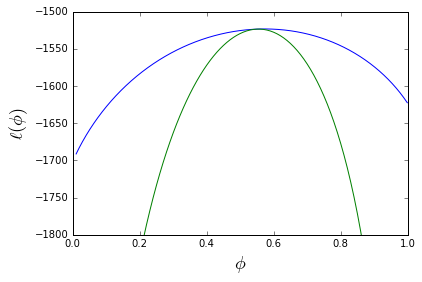

final phi estimate = 0.55


In [710]:
from IPython import display
###Run "EM" algo

###define phi array over which to evaluate f
phi_arr2 = np.arange(0.01, 1, .01) 

### initialize phi to .2
phi_t = .2

###run algo till convergence
tol=.01
perc_diff=tol+1

while perc_diff > tol:
    ### calculate f array given current phi_t and plot
    f_arr=[f_func(phi_t, phi) for phi in phi_arr2]
    plt.gca().cla()
    plt.plot(phi_arr, l_arr)
    plt.ylabel(r'$\ell(\phi)$', fontsize=18)
    plt.xlabel(r'$\phi$', fontsize=18)
    plt.plot(phi_arr2, f_arr)
    plt.ylim([-1800,-1500])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    ### update phi_t
    phi_old = phi_t
    phi_t = phi_arr2[np.argmax(f_arr)]
    
    ### calculate percent change in phi_t
    perc_diff = np.abs(phi_t - phi_old)/phi_old
    
    if perc_diff > tol:
        print('current best phi = ', phi_t)

plt.clf();   
print('final phi estimate =', phi_t )




In [711]:
#### function to generate labels as well as x, y positions of data 

N=100
phi=.6

def generate_data(N, phi, mu_0, mu_1):

    ### generate N samples from Bern(phi)
    n_1, n_0 = np.random.multinomial(N, [phi, 1-phi])
    labels=np.array([0]*n_0+[1]*n_1)

    ### generate an Nx2 design matrix for class 0 (rows are data points, columns are x, y positions)
    A=(np.random.rand(2, 2)-.5)*.5
    Sigma_0 = np.dot(np.transpose(A), A)
    X_0 = np.random.multivariate_normal(mu_0, Sigma_0, n_0)

    ### generate an Nx2 design matrix for class 1
    A=(np.random.rand(2, 2)-.5)*.5
    Sigma_1 = np.dot(np.transpose(A), A)
    X_1 = np.random.multivariate_normal(mu_1, Sigma_1, n_1)

    X = np.vstack((X_0,X_1))

    return (X, labels, Sigma_1, Sigma_2)

In [712]:
###generate data
mu_0=[.4, .4] 
mu_1 = [.8, 1.]

X, y, Sigma_1, Sigma_2 = generate_data(N=100, phi=.6, mu_0 = mu_0, mu_1 = mu_1)

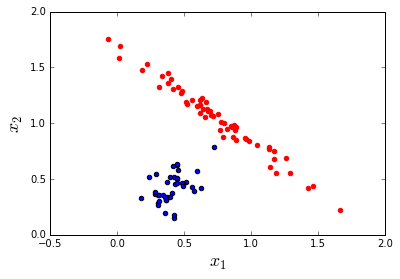

In [713]:
### plot data with classes

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1], color='red')
plt.xlabel(r'$x_1$', fontsize=18)
plt.ylabel(r'$x_2$', fontsize=18);

In [714]:
###cluster with a GMM

from sklearn.mixture import GaussianMixture

gm_mod = GaussianMixture(n_components=2)
gm_mod.fit(X)
preds_gm = gm_mod.predict(X)


In [715]:
### print out actual means and Maximum liklihood means for comparison

mu_0_max_lik = gm_mod.means_[0, :]
mu_1_max_lik = gm_mod.means_[1, :]


print('Actual mu_0 = ')
print(mu_0)
print('Maximum liklihood mu_0= ')
print(mu_1_max_lik)
print(' ')
print('Actual mu_1 = ')
print(mu_1)
print('Maximum liklihood mu_1= ')
print(mu_0_max_lik)

Actual mu_0 = 
[0.4, 0.4]
Maximum liklihood mu_0= 
[ 0.40916567  0.42148387]
 
Actual mu_1 = 
[0.8, 1.0]
Maximum liklihood mu_1= 
[ 0.73772963  1.04869307]


In [716]:
### print out actual covariance matrices and Maximum liklihood covariance matrices for comparison

Sigma_0_max_lik = gm_mod.covariances_[0]
Sigma_1_max_lik = gm_mod.covariances_[1]


print('Actual Sigma_0 = ')
print(Sigma_0)
print(' ')
print('Maximum liklihood Sigma_0 = ')
print(Sigma_1_max_lik)
print(' ')
print('Actual Sigma_1 = ')
print(Sigma_1)
print(' ')
print('Maximum liklihood Sigma_1 = ')
print(Sigma_0_max_lik)

Actual Sigma_0 = 
[[ 0.0270171   0.0039066 ]
 [ 0.0039066   0.00145465]]
 
Maximum liklihood Sigma_0 = 
[[ 0.01143728  0.0065921 ]
 [ 0.0065921   0.01701636]]
 
Actual Sigma_1 = 
[[ 0.11024895 -0.09465267]
 [-0.09465267  0.08381026]]
 
Maximum liklihood Sigma_1 = 
[[ 0.12530242 -0.10777155]
 [-0.10777155  0.09535176]]


In [717]:
### function to plot data

def plot_data(data, mod):
    
    ### get x and y lims
    x_min, x_max = (np.min(data[:, 0])-.1, np.max(data[:, 0])+.1)
    y_min, y_max = (np.min(data[:, 1])-.1, np.max(data[:, 1])+.1)

    ### display predicted scores by the model as a contour plot
    x = np.linspace(x_min, x_max)
    y = np.linspace(y_min, y_max)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -mod.score_samples(XX)
    Z = Z.reshape(X.shape)

    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10))
    CS = plt.contour(X, Y, Z)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(data[:, 0], data[:, 1])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')




/Users/rubind/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


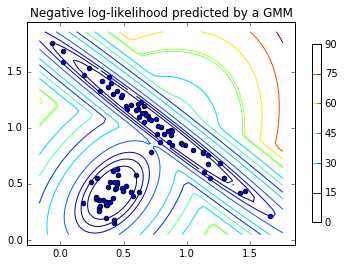

In [718]:
plot_data(X, gm_mod)

In [723]:
from sklearn.cluster import KMeans
### compare GMM misclassification rate with Kmeans misclassification rate
###(i would expect the GMM to do better since that's how the data were generated)

###switch labels and compute mis. rate
preds_gm = -1*(preds_gm-1)
mc_gm = np.sum(preds_gm != y)/len(preds_gm)

##fit KMeans and predict
kmeans=KMeans(n_clusters=2)
kmeans_preds = kmeans.fit(X).predict(X)

###switch labels and compute mis. rate
#kmeans_preds = -1*(kmeans_preds-1)
mc_km = np.sum(kmeans_preds != y)/len(kmeans_preds)


print('GM misclassification rate: ', mc_gm)
print('KM misclassification rate: ', mc_km)

GM misclassification rate:  0.0
KM misclassification rate:  0.07
